# Simple Analysis of Experimental Data

In [86]:
import os, re
import pandas, numpy
from matplotlib import pyplot

In [87]:
# globals

## Basic Information of Each Experiment

In [88]:
root: str = '../00-data'
file: str = os.listdir(root)
filenamesegs: list[list[str]] = []
F: list[pandas.DataFrame] = []
for f in file:
    F.append(pandas.read_csv(os.path.join(root, f)))
    filenameseg: list[str] = os.path.splitext(f)[0].split('_')
    F[-1]['trial number'] = filenameseg[0]
    F[-1]['browser'] = filenameseg[1]
    F[-1]['push enabled'] = filenameseg[2]
    F[-1]['push freq'] = filenameseg[3]
    if len(filenameseg) > 4:
        F[-1]['push type'] = filenameseg[4]
    else:
        F[-1]['push type'] = ''
    filenamesegs.append(filenameseg)
F.sort(key=lambda F: int(re.search(r'\d+', F['trial number'].iat[0])[0]))
file.sort(key=lambda file: int(re.search(r'\d+', file)[0]))
filenamesegs.sort(key=lambda filenameseg: int(re.search(r'\d+', filenameseg[0])[0]))
for i in range(len(file)):
    print(f'<{file[i]}>')
    print(F[i]['Energy trapz (J)'].describe())
    print()

<trial1_chrome_off_idle.csv>
count    30.000000
mean     46.231307
std       2.426237
min      35.072987
25%      45.928497
50%      46.741965
75%      47.259847
max      49.779550
Name: Energy trapz (J), dtype: float64

<trial2_chrome_off_low_even.csv>
count    30.000000
mean     48.062190
std       2.258378
min      40.902735
25%      46.846682
50%      47.755688
75%      49.694906
max      52.517839
Name: Energy trapz (J), dtype: float64

<trial3_chrome_of_low_burst.csv>
count    30.000000
mean     46.470891
std       3.662616
min      31.836826
25%      46.146616
50%      47.540395
75%      48.074592
max      49.775571
Name: Energy trapz (J), dtype: float64

<trial4_chrome_off_high_even.csv>
count    30.000000
mean     57.632000
std       3.423639
min      51.963999
25%      55.341675
50%      57.469885
75%      59.927178
max      66.669379
Name: Energy trapz (J), dtype: float64

<trial5_chrome_off_high_burst.csv>
count    30.000000
mean     55.722850
std       2.122315
min      51

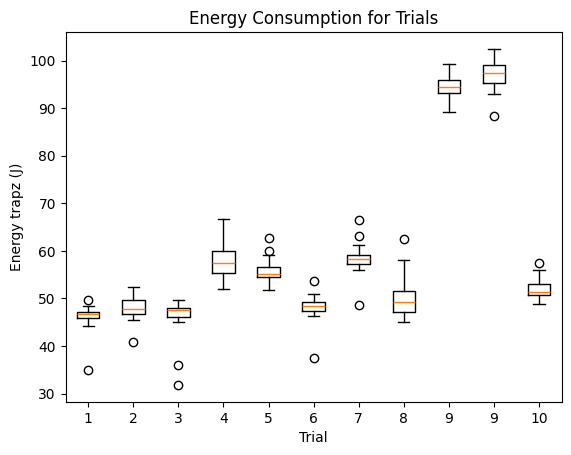

In [89]:
merged_energy_data: list[pandas.Series] = []
for f in F:
    merged_energy_data.append(f['Energy trapz (J)'])

fig, ax = pyplot.subplots()
ax.set_title('Energy Consumption for Trials')
ax.boxplot(merged_energy_data)
ax.set_xlabel('Trial')
ax.set_ylabel('Energy trapz (J)')
xticklabels: list[str] = []
for filenameseg in filenamesegs:
    xticklabels.append(re.search(r'\d+', filenameseg[0])[0])
ax.set_xticklabels(xticklabels)
pyplot.show()